In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from lheHelper import getLHEevents,getInfo,EventDict,ParticleList

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
fList = ['../processFolders/pp2GG/Events/run_01/unweighted_events.lhe.gz',
        '../processFolders/pp2GG/Events/run_02/unweighted_events.lhe.gz',
         '../processFolders/pp2GG/Events/run_03/unweighted_events.lhe.gz',
        '../processFolders/pp2GG/Events/run_04/unweighted_events.lhe.gz']

In [3]:
infoDict = {f : getInfo(f) for f in fList}

In [4]:
for f,infoD in infoDict.items():
    nevents,events = getLHEevents(f)
    pDict = EventDict.fromEvents(events,nevents,
                                    pdgs=[1000021],
                                    status=[1],labels=['go'])
    infoD.update({'pDict' : pDict})

In [5]:
# Sort by mass
infoDict = {key : val for key,val in sorted(list(infoDict.items()), key = lambda x: x[1]['mGluino'])}

In [6]:
for infoD in infoDict.values():
    print(r'mGluino = %1.0f GeV : total xsec = %1.2e pb' %(infoD['mGluino'],sum(infoD['pDict'].go[0].weight)))

mGluino = 300 GeV : total xsec = 2.92e+02 pb
mGluino = 500 GeV : total xsec = 1.76e+01 pb
mGluino = 1000 GeV : total xsec = 2.01e-01 pb
mGluino = 1500 GeV : total xsec = 7.92e-03 pb


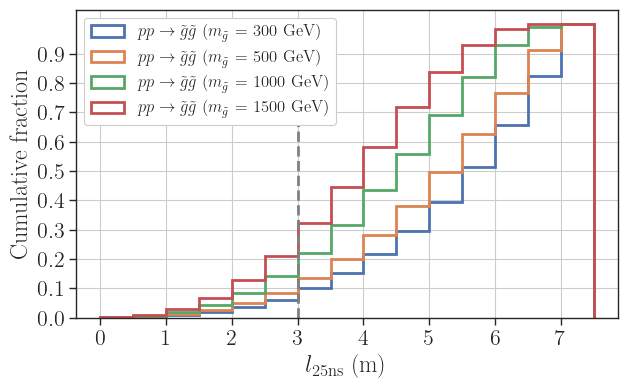

In [7]:
plt.figure(figsize=(7,4))
bins=np.arange(0.,8.0,0.5)
for infoD in infoDict.values():
    go = infoD['pDict'].go[0] # Use only the first gluino
    l = np.array(go.Beta)*3e8*25e-9
    w = np.array(go.weight)
    w = w/sum(w)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
    plt.hist(l,bins=bins,weights=w,cumulative=True,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='upper left',framealpha=1.0,fontsize=12)
plt.vlines(x=3.0,ymin=0.,ymax=1.0,linestyle='dashed',linewidth=2,color='gray')
# plt.yscale('log')
plt.xlabel(r'$l_{\rm 25ns}$ (m)')
plt.yticks(np.arange(0.,1.,0.1))
plt.xticks(np.arange(0.,8.,1.0))
plt.grid()
plt.ylabel('Cumulative fraction')
plt.savefig('Cumulative_l25.png')
plt.show()

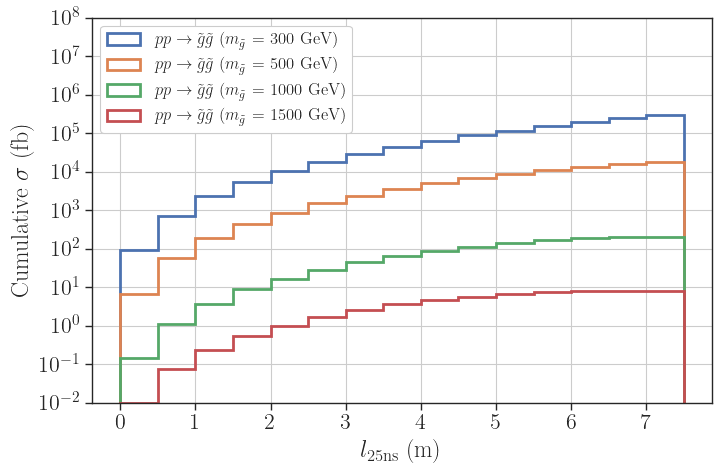

In [8]:
plt.figure(figsize=(8,5))
bins=np.arange(0.,8.0,0.5)
for infoD in infoDict.values():
    go = infoD['pDict'].go[0] # Use only the first gluino
    l = np.array(go.Beta)*3e8*25e-9
    w = np.array(go.weight)*1e3
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']    
    plt.hist(l,bins=bins,weights=w,cumulative=True,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='upper left',framealpha=1.0,fontsize=12)
plt.yscale('log')
plt.yticks(np.logspace(-4,8,13))
plt.ylim(1e-2,1e8)
plt.xlabel(r'$l_{\rm 25ns}$ (m)')
plt.ylabel(r'Cumulative $\sigma$ (fb)')
plt.savefig('CumulativeXsec_l25.png')
plt.grid()
plt.show()

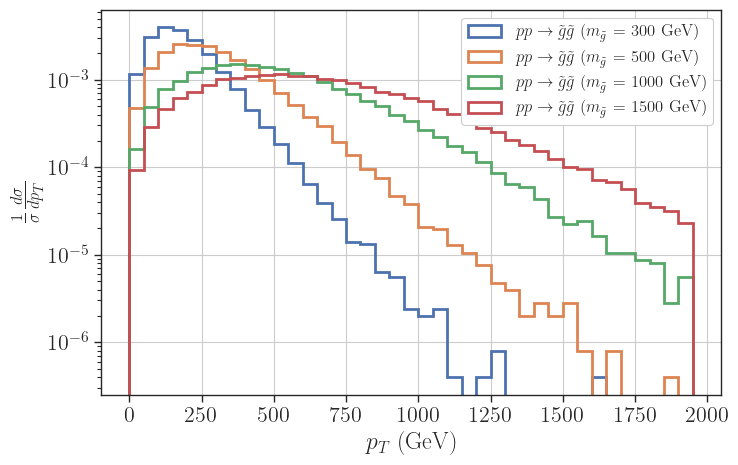

In [9]:
plt.figure(figsize=(8,5))
bins=np.arange(0.,2000.0,50.0)
for infoD in infoDict.values():
    go = infoD['pDict'].go[0] # Use only the first gluino
    w = np.array(go.weight)*1e3
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']    
    plt.hist(go.PT,bins=bins,weights=w,density=True,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='upper right',framealpha=1.0,fontsize=12)
plt.yscale('log')
# plt.yticks(np.logspace(-5,2,8))
# plt.ylim(1e-5,1e4)
plt.xlabel(r'$p_T$ (GeV)')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d p_T}$')
# plt.title('Propagation length')
plt.grid()
plt.savefig('pT_hist.png')
plt.show()

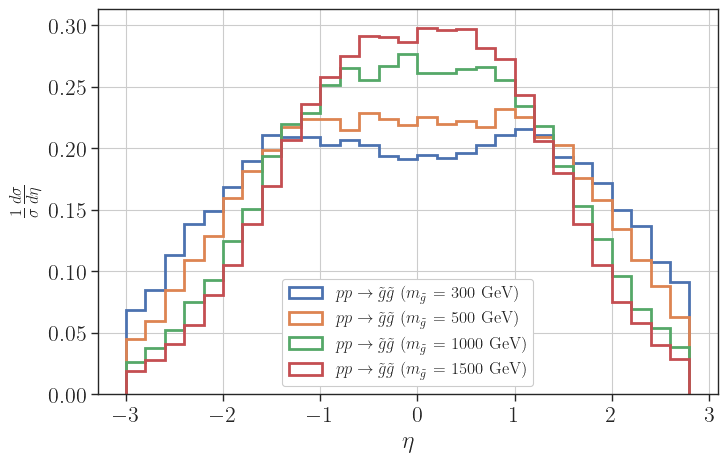

In [10]:
plt.figure(figsize=(8,5))
bins=np.arange(-3.,3.0,0.2)
for infoD in infoDict.values():
    go = infoD['pDict'].go[0] # Use only the first gluino
    w = np.array(go.weight)*1e3
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']     
    plt.hist(go.Eta,bins=bins,weights=w,density=True,
             histtype='step',label=label,linewidth=2)

# plt.hist(n1,bins=20,density=True,histtype='step',label=r'$\tilde{\chi}_1^0$',linewidth=2)
plt.legend(loc='lower center',framealpha=1.0,fontsize=12)
# plt.yscale('log')
# plt.yticks(np.logspace(-5,2,8))
# plt.ylim(1e-5,1e4)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d \eta}$')
plt.grid()
plt.savefig('eta_hist.png')
plt.show()

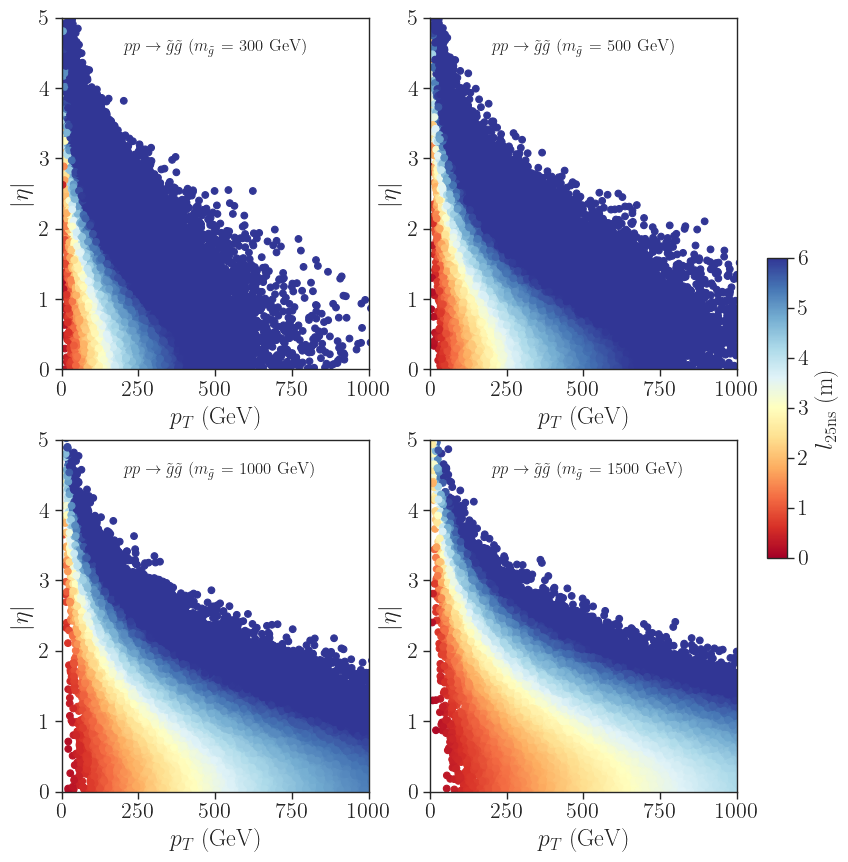

In [11]:
fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
                           ncols=2,figsize=(10,len(infoDict)*1.5))
for i,infoD in enumerate(infoDict.values()): 
    ax = axarray.reshape(-1)[i]
    go = infoD['pDict'].go[0] # Use only the first gluino
    l = np.array(go.Beta)*3e8*25e-9
    r = ax.scatter(go.PT,np.abs(go.Eta),c=l,cmap=cm,vmin=0.,vmax=6.0)    
    ax.set_xlabel('$p_T$ (GeV)')
    ax.set_ylabel('$|\eta|$')
    ax.set_xlim(0.,1000.)
    ax.set_ylim(0.,5.0)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
    ax.text(200.0,4.5,label,fontsize=12)
    # ax.set_title(label)

fig.subplots_adjust(right=0.8,top=1.4)
cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 0.5])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(r,label=r'$l_{\rm 25ns}$ (m)',cax=cbar_ax)
# plt.tight_layout()
plt.savefig('pT_eta_l25.png')
plt.show()

In [12]:
# fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
#                            ncols=2,figsize=(14,len(infoDict)*1.2))
# for i,infoD in enumerate(infoDict.values()): 
#     ax = axarray.reshape(-1)[i]
#     go = infoD['pDict'].go[0] # Use only the first gluino
#     r = ax.hist2d(go.PT,np.abs(go.Eta),bins=(np.arange(0.,1000.,100.),np.arange(0.,3.5,0.5)),vmin=0.,vmax=0.05,
#            weights=[1/len(go)]*len(go),cmap=cm)
  
#     ax.set_xlabel('$p_T$ (GeV)')
#     ax.set_ylabel('$|\eta|$')
#     ax.set_xlim(0.,1000.)
#     ax.set_ylim(0.,3.0)
#     label = infoD['process']
#     label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
#     # ax.text(200.0,4.5,label,fontsize=12)
#     ax.set_title(label)

# fig.subplots_adjust(right=0.8,top=2)
# cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 1.0])
# # fig.colorbar(r, cax=cbar_ax)    
# fig.colorbar(r[3],label=r'Density',cax=cbar_ax)
# # plt.tight_layout()
# plt.show()

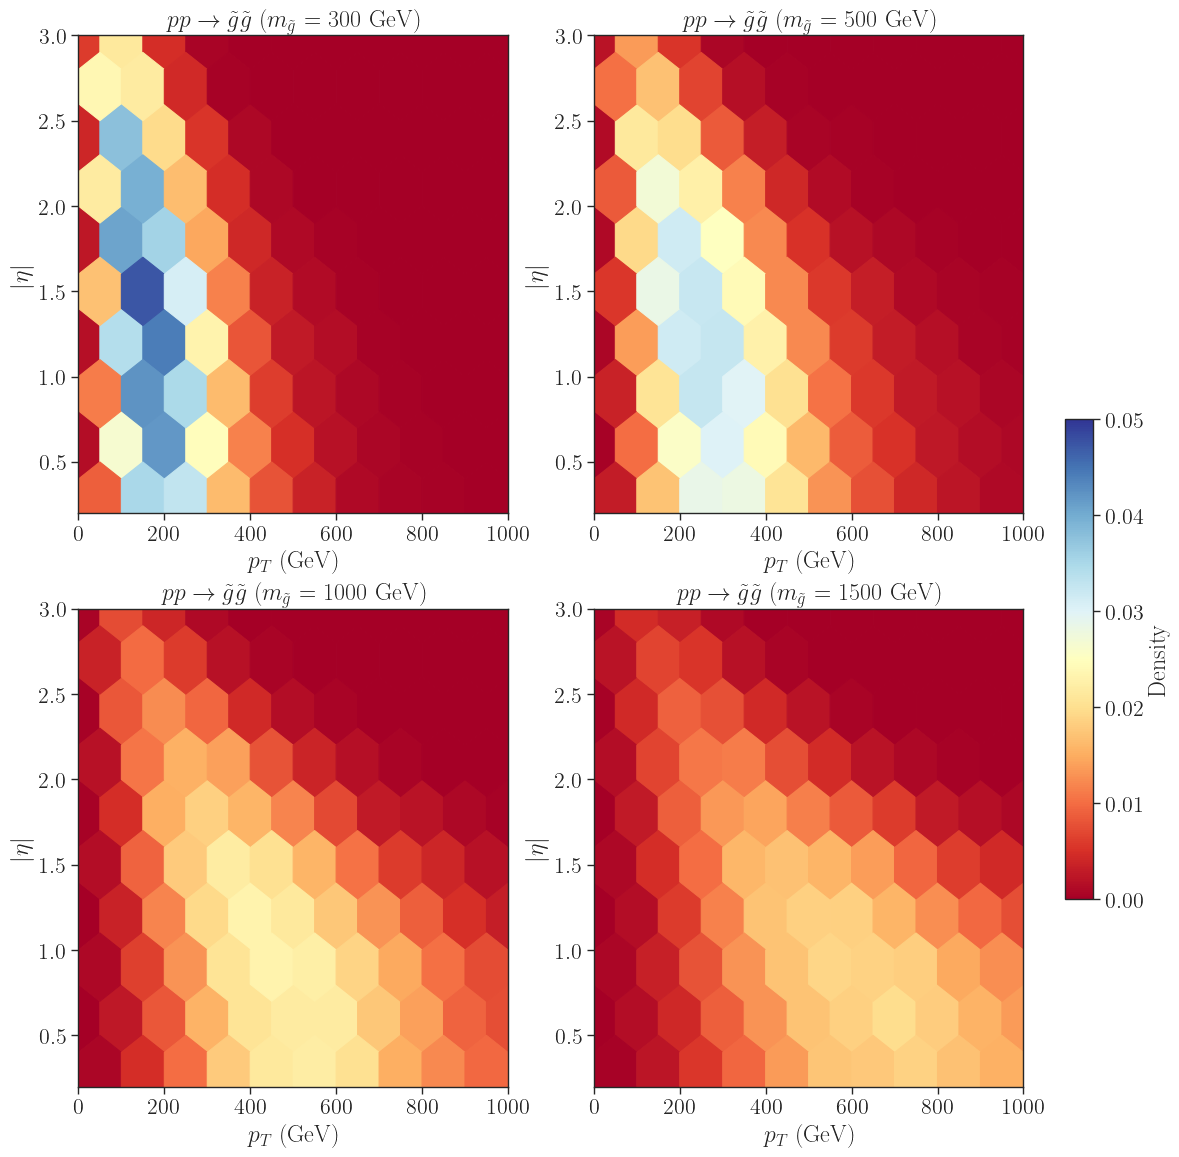

In [13]:
fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
                           ncols=2,figsize=(14,len(infoDict)*1.2))
for i,infoD in enumerate(infoDict.values()): 
    ax = axarray.reshape(-1)[i]
    go = infoD['pDict'].go[0] # Use only the first gluino
    r = ax.hexbin(go.PT,np.abs(go.Eta),gridsize=10,vmin=0.,vmax=0.05,
            extent=(0.,1000.,0.0,3.0),
            C=[1/len(go)]*len(go),reduce_C_function=np.sum,
            cmap=cm)
  
    ax.set_xlabel('$p_T$ (GeV)')
    ax.set_ylabel('$|\eta|$')
    ax.set_xlim(0.,1000.)
    ax.set_ylim(0.2,3.0)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
    # ax.text(200.0,4.5,label,fontsize=12)
    ax.set_title(label)

fig.subplots_adjust(right=0.8,top=2.3)
cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 1.0])
fig.colorbar(r,label=r'Density',cax=cbar_ax)
# plt.tight_layout()
plt.savefig('pT_eta_density.png')
plt.show()

In [14]:
goSel = ParticleList()

In [15]:
# fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
#                            ncols=2,figsize=(14,len(infoDict)*1.5))
# for i,infoD in enumerate(infoDict.values()): 
#     ax = axarray.reshape(-1)[i]
#     go = infoD['pDict'].go[0] # Use only the first gluino
#     goSel.particleList = [c for c in go if c.Beta*3e8*25e-9 < 3.0]
#     r = ax.hist2d(goSel.PT,np.abs(goSel.Eta),bins=10,vmin=0.,vmax=1e-2,
#            weights=[1/len(go)]*len(goSel),cmap=cm)
  
#     ax.set_xlabel('$p_T$ (GeV)')
#     ax.set_ylabel('$|\eta|$')
#     # ax.set_xlim(0.,1000.)
#     # ax.set_ylim(0.,5.0)
#     label = infoD['process']
#     label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
#     # ax.text(200.0,4.5,label,fontsize=12)
#     ax.set_title(label)

# fig.subplots_adjust(right=0.8,top=2)
# cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 0.5])
# # fig.colorbar(r, cax=cbar_ax)    
# fig.colorbar(r[3],label=r'Density ($l < 3$ m)',cax=cbar_ax)
# # plt.tight_layout()
# plt.show()

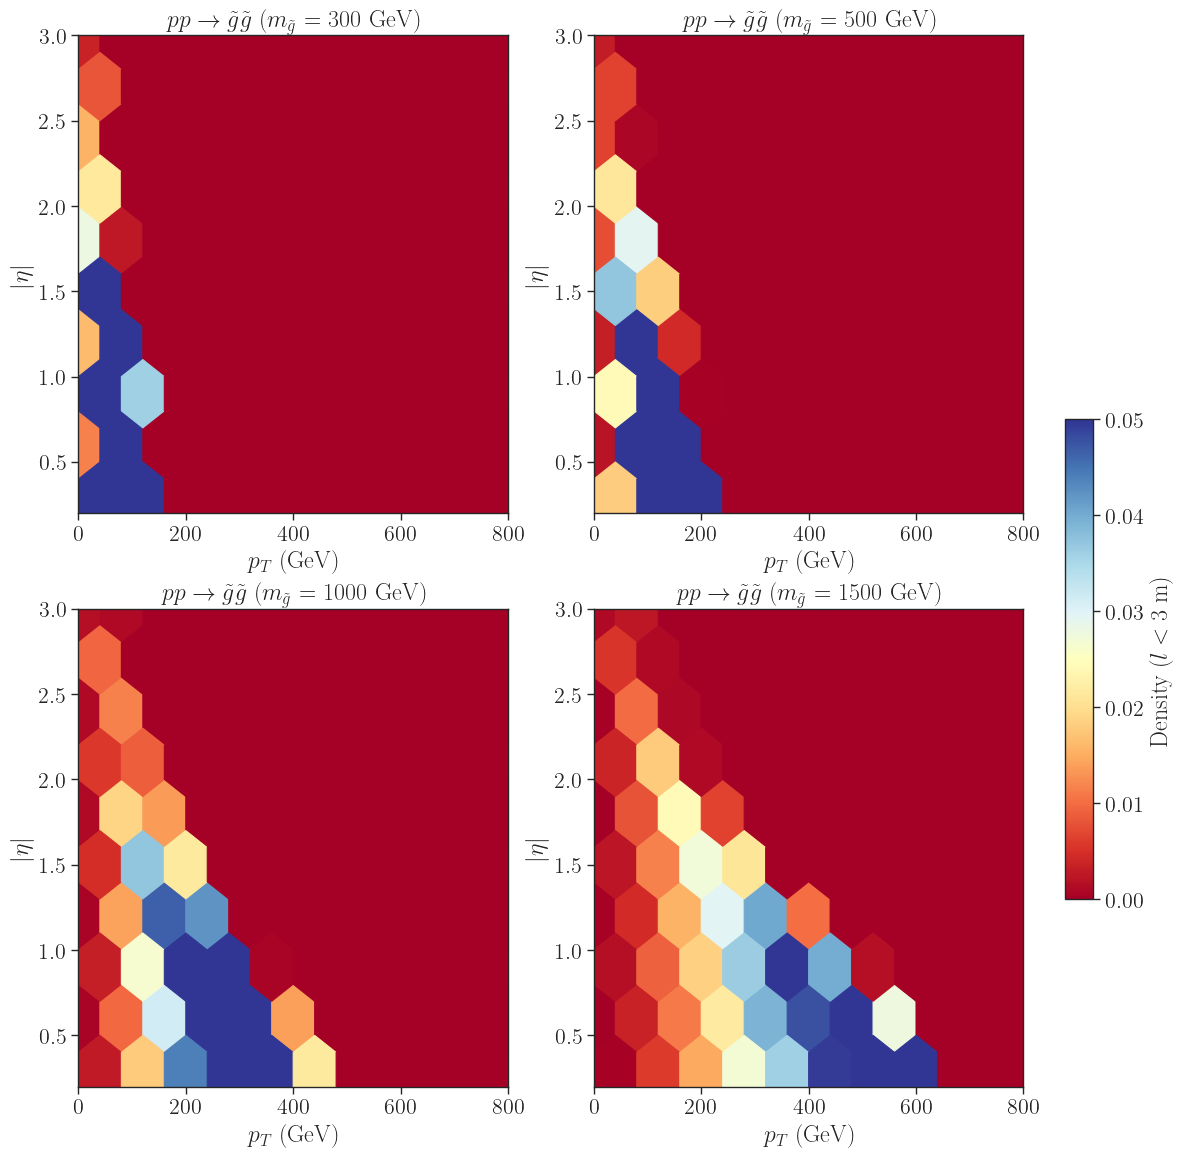

In [16]:
fig,axarray = plt.subplots(nrows=int(np.ceil(len(infoDict)/2)),
                           ncols=2,figsize=(14,len(infoDict)*1.2))
for i,infoD in enumerate(infoDict.values()): 
    ax = axarray.reshape(-1)[i]
    go = infoD['pDict'].go[0] # Use only the first gluino
    goSel.particleList = [c for c in go if c.Beta*3e8*25e-9 < 3.0]
    r = ax.hexbin(goSel.PT,np.abs(goSel.Eta),gridsize=10,vmin=0.,vmax=0.05,
            extent=(0.,800.,0.0,3.0),
            C=[1/len(goSel)]*len(goSel),reduce_C_function=np.sum,
            cmap=cm)
  
    ax.set_xlabel('$p_T$ (GeV)')
    ax.set_ylabel('$|\eta|$')
    ax.set_xlim(0.,800.)
    ax.set_ylim(0.2,3.0)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV)' %infoD['mGluino']
    # ax.text(200.0,4.5,label,fontsize=12)
    ax.set_title(label)

fig.subplots_adjust(right=0.8,top=2.3)
cbar_ax = fig.add_axes([0.83, 0.5, 0.02, 1.0])
fig.colorbar(r,label=r'Density ($l < 3$ m)',cax=cbar_ax)
# plt.tight_layout()
plt.savefig('pT_eta_densityCut.png')
plt.show()